<p style="font-family: 'Courier New', Courier, monospace; font-size: 40px; font-weight: bold; color: blue;  text-align: center;">
  Indoor Path Loss and Shadowing Simulation
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulate_path_loss(
    d0=1.0,
    PL0_dB=40.0,
    n=4.0,
    sigma=10.0,
    wall_spacing_min=4.0,
    wall_spacing_max=10.0,
    wall_loss_min=5.0,
    wall_loss_max=12.0,
    d_max=80,
    num_points=1000,
    seed=42
):
    """
    Simulate and plot path loss with and without log-normal shadowing in an indoor environment
    featuring randomly spaced walls and variable wall attenuation.

    Parameters:
        d0 (float): Reference distance in meters.
        PL0_dB (float): Path loss at reference distance d0 in dB.
        n (float): Path loss exponent.
        sigma (float): Shadowing standard deviation in dB.
        wall_spacing_min (float): Minimum spacing between walls in meters.
        wall_spacing_max (float): Maximum spacing between walls in meters.
        wall_loss_min (float): Minimum attenuation per wall in dB.
        wall_loss_max (float): Maximum attenuation per wall in dB.
        d_max (float): Maximum distance in meters.
        num_points (int): Number of distance points.
        seed (int): Random seed for reproducibility.
    """
    np.random.seed(seed)
    
    # Generate wall positions with random spacing between wall_spacing_min and wall_spacing_max
    wall_positions = []
    current_pos = 0.0
    while current_pos < d_max:
        spacing = np.random.uniform(wall_spacing_min, wall_spacing_max)
        current_pos += spacing
        if current_pos < d_max:
            wall_positions.append(current_pos)
    
    wall_positions = np.array(wall_positions)
    num_walls_total = len(wall_positions)
    
    # Assign random wall loss between wall_loss_min and wall_loss_max for each wall
    wall_losses = np.random.uniform(wall_loss_min, wall_loss_max, size=num_walls_total)
    cumulative_wall_losses = np.cumsum(wall_losses)
    
    # Distance array
    d = np.linspace(1, d_max, num_points)
    
    # For each distance, find the number of walls encountered
    walls_encountered = np.searchsorted(wall_positions, d, side='right')
    
    # Total wall loss for each distance
    total_wall_loss_dB = np.where(
        walls_encountered > 0,
        cumulative_wall_losses[walls_encountered - 1],
        0.0
    )
    
    # Log-distance path loss
    PL_dB = PL0_dB + 10 * n * np.log10(d / d0) + total_wall_loss_dB
    
    # Path loss with shadowing
    shadowing = np.random.normal(0, sigma, size=d.shape)
    PL_shadowing_dB = PL_dB + shadowing
    
    # Plotting
    plt.figure(figsize=(4, 2))
    plt.plot(d, PL_dB, label='Log-Distance path loss')
    plt.plot(d, PL_shadowing_dB, label='Log-Distance path loss and shadowing', alpha=0.7)
    plt.xscale('log')
    plt.xlabel('Distance (m)')
    plt.ylabel('Path Loss (dB)')
    plt.legend(fontsize='small')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('../all_data_files/PL_and_Shadowing_Simulation.png', dpi=1000)
    plt.show()

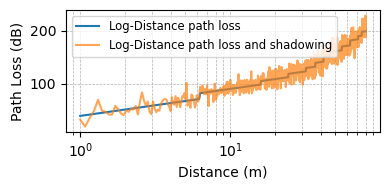

In [3]:
simulate_path_loss()